In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('ph-data.csv')
df

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4
...,...,...,...,...
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13


In [3]:
df.isnull().sum()

blue     0
green    0
red      0
label    0
dtype: int64

In [4]:
df['label'].value_counts()

label
1     44
2     44
3     44
4     44
5     44
6     44
7     44
8     44
9     44
10    44
11    44
12    44
14    44
13    43
0     38
Name: count, dtype: int64

In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [9]:
def normalize_rgb(data):
    total = data['blue'] + data['green'] + data['red']
    data['red'] = data['red'] / total
    data['blue'] = data['blue'] / total
    data['green'] = data['green'] / total
    return data
    
from sklearn import preprocessing
X_train_normalized = preprocessing.normalize(x_train)
X_test_normalized = preprocessing.normalize(x_test)

In [10]:
X_train_percentage = normalize_rgb(x_train)
X_test_percentage = normalize_rgb(x_test)

KNN Accuracy: 0.7251908396946565
Precision: 0.7627135587059252
Recall: 0.7251908396946565
F1-Score: 0.7291423731989846
Confusion Matrix:
[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  3  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  2  7  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 11  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  6  1  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  8  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  6]]


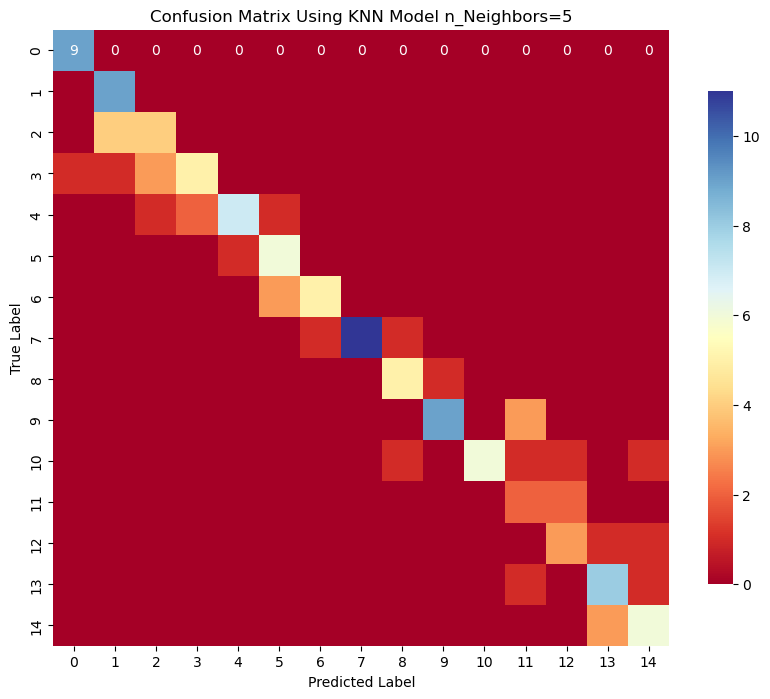

In [11]:
# k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5, weights=None, algorithm='ball_tree')  # Specifing the number of neighbors (k)
knn_model.fit(x_train, y_train)

# Predicting the target variable for the test set
knn_predictions = knn_model.predict(x_test)

# Calculating accuracy score for KNN
knn_accuracy1 = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy1)

# Precision
precision = precision_score(y_test, knn_predictions, average='weighted')  
print("Precision:", precision)

# Recall
recall = recall_score(y_test, knn_predictions, average='weighted')  
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, knn_predictions, average='weighted')  
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# unique class labels from y_test
class_labels = sorted(set(y_test))

# Plotting Confusion Matrix as a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdYlBu', square=True,
            xticklabels=class_labels, yticklabels=class_labels,
            cbar_kws={"shrink": 0.8})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Using KNN Model n_Neighbors=5')
plt.show()


KNN Accuracy: 0.7251908396946565
Precision: 0.7184412279832126
Recall: 0.6870229007633588
F1-Score: 0.6839418439665408
Confusion Matrix:
[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  3  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  2  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 11  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  1  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  7  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  8  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  4  5]]


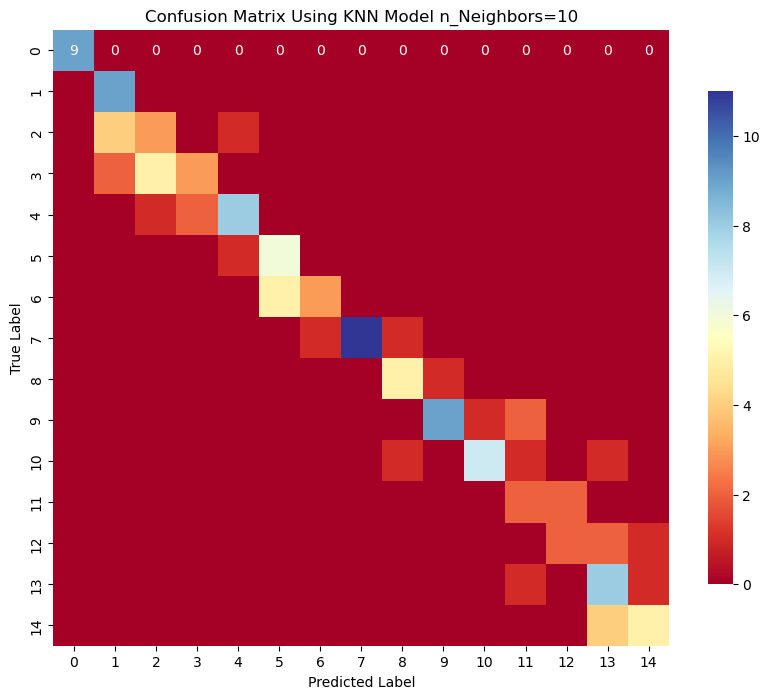

In [12]:
# k-Nearest Neighbors (KNN)
knn_model2 = KNeighborsClassifier(n_neighbors=10, weights=None, algorithm='ball_tree')  # Specifing the number of neighbors (k)
knn_model2.fit(x_train, y_train)

# Predicting the target variable for the test set
knn_predictions2 = knn_model2.predict(x_test)

# Calculating accuracy score for KNN
knn_accuracy2 = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy2)

# Precision
precision = precision_score(y_test, knn_predictions2, average='weighted')  
print("Precision:", precision)

# Recall
recall = recall_score(y_test, knn_predictions2, average='weighted')  
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, knn_predictions2, average='weighted')  
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix2 = confusion_matrix(y_test, knn_predictions2)
print("Confusion Matrix:")
print(conf_matrix2)

# unique class labels from y_test
class_labels = sorted(set(y_test))

# Plotting Confusion Matrix as a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='RdYlBu', square=True,
            xticklabels=class_labels, yticklabels=class_labels,
            cbar_kws={"shrink": 0.8})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Using KNN Model n_Neighbors=10')
plt.show()

KNN Accuracy: 0.7251908396946565
Precision: 0.7265382835993522
Recall: 0.6946564885496184
F1-Score: 0.6931093612479947
Confusion Matrix:
[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 11  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  1  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  7  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  8  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  6]]


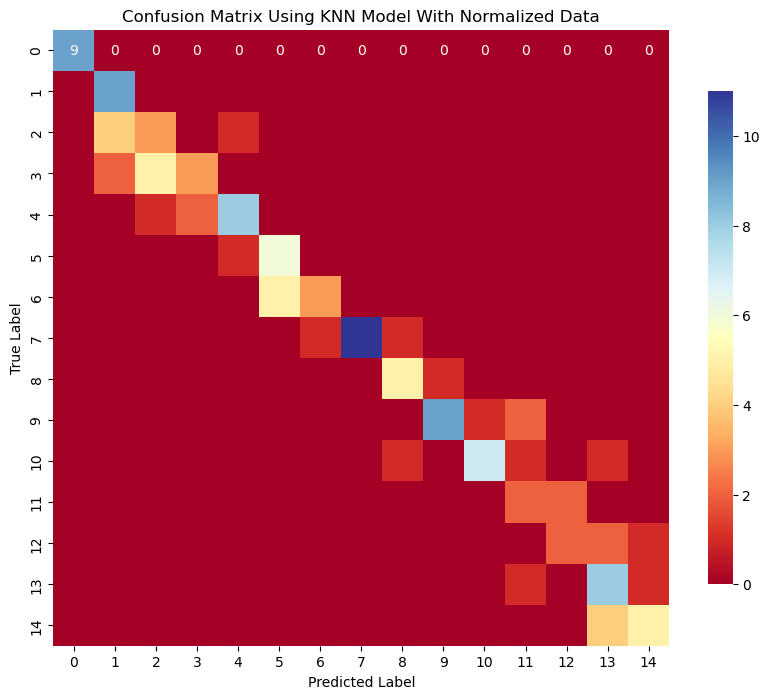

In [13]:

# k-Nearest Neighbors (KNN)
knn_model3 = KNeighborsClassifier(n_neighbors= 10, weights = None,algorithm = 'ball_tree')  # Specifing the number of neighbors (k)
knn_model3.fit(X_train_normalized, y_train)

# Predicting the target variable for the test set
knn_predictions3 = knn_model3.predict(X_test_normalized)

# Calculating accuracy score for KNN
knn_accuracy3 = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy3)

# Precision
precision = precision_score(y_test, knn_predictions3, average='weighted')  
print("Precision:", precision)

# Recall
recall = recall_score(y_test, knn_predictions3, average='weighted')  
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, knn_predictions3, average='weighted')  
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix3 = confusion_matrix(y_test, knn_predictions3)
print("Confusion Matrix:")
print(conf_matrix3)

# unique class labels from y_test
class_labels = sorted(set(y_test))

# Plotting Confusion Matrix as a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='RdYlBu', square=True,
            xticklabels=class_labels, yticklabels=class_labels,
            cbar_kws={"shrink": 0.8})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Using KNN Model With Normalized Data')
plt.show()

D:\AnaConda-01\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


KNN Accuracy: 0.7251908396946565
Precision: 0.7265382835993522
Recall: 0.6946564885496184
F1-Score: 0.6931093612479947
Confusion Matrix:
[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 11  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  1  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  7  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  8  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  6]]


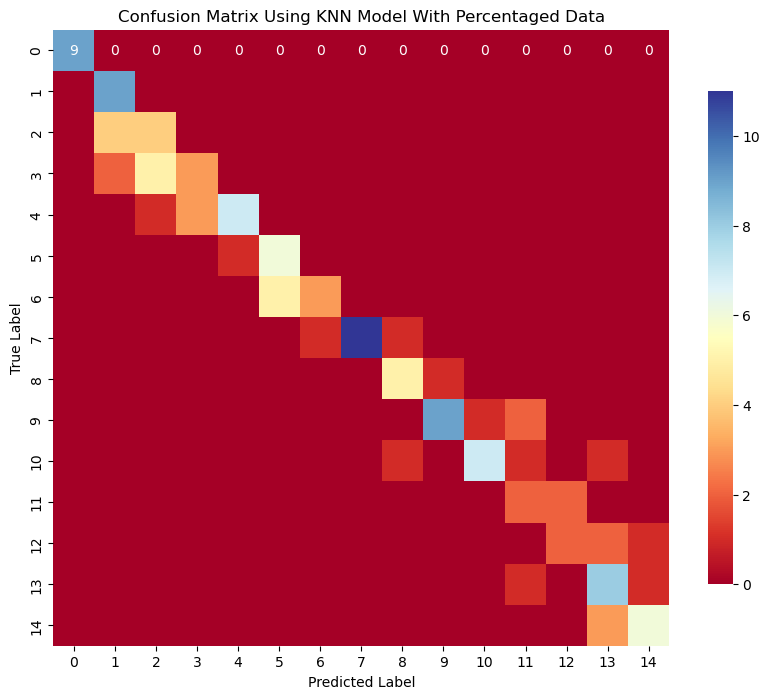

In [14]:
# k-Nearest Neighbors (KNN)
knn_model4 = KNeighborsClassifier(n_neighbors= 10, weights = None,algorithm = 'ball_tree')  # Specifing the number of neighbors (k)
knn_model4.fit(X_train_normalized, y_train)

# Predicting the target variable for the test set
knn_predictions4 = knn_model4.predict(X_test_percentage)

# Calculating accuracy score for KNN
knn_accuracy4 = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy4)

# Precision
precision = precision_score(y_test, knn_predictions4, average='weighted')  
print("Precision:", precision)

# Recall
recall = recall_score(y_test, knn_predictions4, average='weighted')  
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, knn_predictions4, average='weighted')  
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix4 = confusion_matrix(y_test, knn_predictions4)
print("Confusion Matrix:")
print(conf_matrix4)

# unique class labels from y_test
class_labels = sorted(set(y_test))

# Plotting Confusion Matrix as a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='RdYlBu', square=True,
            xticklabels=class_labels, yticklabels=class_labels,
            cbar_kws={"shrink": 0.8})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Using KNN Model With Percentaged Data')
plt.show()

<p6> <b> KNN Model n_Neighbors=5 yields the highest precision and accuracy compared to the other three KNN models. </b>